# AQI Predictions: Air Quality Analysis and Forecasting

## Mohamed Mohamed | COMP 3125 | Spring 2025


        -A data science project to analyze and predict AQI using machine learning models
        based on environmental and pollution data.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")


In [10]:
# Load datasets
df_aqi = pd.read_csv("daily_aqi_by_county2023.csv")
df_pollution = pd.read_csv("Pollution 2000_2003.csv", error_bad_lines=False)
df_sensor = pd.read_csv("AirQuality.csv")

# Quick preview
print("AQI Dataset:")
display(df_aqi.head())

print("Pollution Dataset:")
display(df_pollution.head())

print("Sensor Dataset:")
display(df_sensor.head())


b'Skipping line 6492: expected 22 fields, saw 23\nSkipping line 16767: expected 22 fields, saw 28\nSkipping line 23433: expected 22 fields, saw 36\n'
b'Skipping line 43306: expected 22 fields, saw 36\n'
b'Skipping line 76292: expected 22 fields, saw 23\nSkipping line 82789: expected 22 fields, saw 27\nSkipping line 96273: expected 22 fields, saw 31\n'
b'Skipping line 116284: expected 22 fields, saw 25\n'
b'Skipping line 142967: expected 22 fields, saw 33\nSkipping line 156426: expected 22 fields, saw 27\nSkipping line 162991: expected 22 fields, saw 33\n'
b'Skipping line 203155: expected 22 fields, saw 27\nSkipping line 209697: expected 22 fields, saw 31\n'
b'Skipping line 243176: expected 22 fields, saw 28\n'
b'Skipping line 263053: expected 22 fields, saw 33\nSkipping line 283535: expected 22 fields, saw 26\nSkipping line 290031: expected 22 fields, saw 23\n'
b'Skipping line 296125: expected 22 fields, saw 34\n'
b'Skipping line 364056: expected 22 fields, saw 24\nSkipping line 370552

AQI Dataset:


,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2023-01-10,47,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2023-01-11,38,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2023-01-12,30,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2023-01-13,24,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2023-01-14,27,Good,PM2.5,01-003-0010,1


Pollution Dataset:


,Unnamed: 0,Date,Address,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,0,2000-01-01,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.019765,0.04,10.0,37.0,...,23.0,25.0,3.000000,9.0,21.0,13.0,19.041667,49.0,19.0,46.0
1,1,2000-01-02,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.032,10.0,30.0,...,0.0,26.0,1.958333,3.0,22.0,4.0,22.958333,36.0,19.0,34.0
2,2,2000-01-03,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.009353,0.016,9.0,15.0,...,8.0,28.0,5.250000,11.0,19.0,16.0,38.125000,51.0,8.0,48.0
3,3,2000-01-04,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.033,9.0,31.0,...,23.0,34.0,7.083333,16.0,8.0,23.0,40.260870,74.0,8.0,72.0
4,4,2000-01-05,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.007353,0.012,9.0,11.0,...,2.0,42.0,8.708333,15.0,7.0,21.0,48.450000,61.0,22.0,58.0


Sensor Dataset:


,,,,,Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;
10/03/2004;18.00.00;2,6;1360;150;11,9;1046;166;1056;113;1692;1268;13,6;48,9;0,7578;;
10/03/2004;19.00.00;2;1292;112;9,4;955;103;1174;92;1559;972;13,3;47,7;0,7255;;,NaN
10/03/2004;20.00.00;2,2;1402;88;9,0;939;131;1140;114;1555;1074;11,9;54,0;0,7502;;
10/03/2004;21.00.00;2,2;1376;80;9,2;948;172;1092;122;1584;1203;11,0;60,0;0,7867;;
10/03/2004;22.00.00;1,6;1272;51;6,5;836;131;1205;116;1490;1110;11,2;59,6;0,7888;;


In [37]:
df_aqi = pd.read_csv("daily_aqi_by_county2023.csv")
df_pollution = pd.read_csv("Pollution 2000_2003.csv", engine="python", error_bad_lines=False)


# Clean column names
def clean_columns(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("-", "_")
    return df

df_aqi = clean_columns(df_aqi)
df_pollution = clean_columns(df_pollution)

# Convert date columns
df_aqi['date'] = pd.to_datetime(df_aqi['date'], errors='coerce')
df_pollution['date'] = pd.to_datetime(df_pollution['date'], errors='coerce')

# Drop rows with missing or invalid dates
df_aqi = df_aqi.dropna(subset=['date'])
df_pollution = df_pollution.dropna(subset=['date'])


df_aqi = df_aqi.dropna().drop_duplicates()
df_pollution = df_pollution.dropna().drop_duplicates()


df_aqi.head(), df_pollution.head()


Skipping line 6492: field larger than field limit (131072)
Skipping line 292168: ',' expected after '"'
Skipping line 372689: field larger than field limit (131072)
Skipping line 617446: ',' expected after '"'
Skipping line 699532: field larger than field limit (131072)
Skipping line 870236: field larger than field limit (131072)
Skipping line 903689: field larger than field limit (131072)
Skipping line 1088976: field larger than field limit (131072)
Skipping line 18903: Expected 22 fields in line 18903, saw 28
Skipping line 25569: Expected 22 fields in line 25569, saw 36
Skipping line 45442: Expected 22 fields in line 45442, saw 36
Skipping line 78428: Expected 22 fields in line 78428, saw 23
Skipping line 84925: Expected 22 fields in line 84925, saw 27
Skipping line 98409: Expected 22 fields in line 98409, saw 31
Skipping line 118420: Expected 22 fields in line 118420, saw 25
Skipping line 145103: Expected 22 fields in line 145103, saw 33
Skipping line 158562: Expected 22 fields in l

(  state_name county_name  state_code  county_code       date  aqi category  \
 0    Alabama     Baldwin           1            3 2023-01-10   47     Good   
 1    Alabama     Baldwin           1            3 2023-01-11   38     Good   
 2    Alabama     Baldwin           1            3 2023-01-12   30     Good   
 3    Alabama     Baldwin           1            3 2023-01-13   24     Good   
 4    Alabama     Baldwin           1            3 2023-01-14   27     Good   
 
   defining_parameter defining_site  number_of_sites_reporting  
 0              PM2.5   01-003-0010                          1  
 1              PM2.5   01-003-0010                          1  
 2              PM2.5   01-003-0010                          1  
 3              PM2.5   01-003-0010                          1  
 4              PM2.5   01-003-0010                          1  ,
   unnamed:_0       date                                  address    state  \
 0          0 2000-01-01  1645 E ROOSEVELT ST-CENTRAL P

In [38]:
def clean_columns(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("-", "_")
    return df

df_aqi = clean_columns(df_aqi)
df_pollution = clean_columns(df_pollution)


In [39]:
df_aqi['date'] = pd.to_datetime(df_aqi['date'], errors='coerce')
df_pollution['date'] = pd.to_datetime(df_pollution['date'], errors='coerce')


In [18]:
df_pollution['county'] = df_pollution['county'].str.lower()
df_aqi['county_name'] = df_aqi['county_name'].str.lower()

df_merged = pd.merge(df_aqi, df_pollution, left_on=['date', 'county_name'], right_on=['date', 'county'], how='inner')
df_merged.head()


,state_name,county_name,state_code,county_code,date,aqi,category,defining_parameter,defining_site,number_of_sites_reporting,...,co_1st_max_hour,co_aqi,so2_mean,so2_1st_max_value,so2_1st_max_hour,so2_aqi,no2_mean,no2_1st_max_value,no2_1st_max_hour,no2_aqi
0,Alabama,dekalb,1,49,2023-01-01,48,Good,PM2.5,01-049-1003,2,...,23.0,6.0,-0.095833,0.2,23.0,0.0,7.252941,17.9,20.0,16.0
1,Georgia,dekalb,13,89,2023-01-01,54,Moderate,PM2.5,13-089-0002,2,...,23.0,6.0,-0.095833,0.2,23.0,0.0,7.252941,17.9,20.0,16.0
2,Tennessee,dekalb,47,41,2023-01-01,31,Good,Ozone,47-041-9991,1,...,23.0,6.0,-0.095833,0.2,23.0,0.0,7.252941,17.9,20.0,16.0
3,Alabama,dekalb,1,49,2023-01-02,52,Moderate,PM2.5,01-049-1003,2,...,4.0,11.0,0.041667,0.3,1.0,0.0,5.112500,13.1,10.0,12.0
4,Georgia,dekalb,13,89,2023-01-02,57,Moderate,PM2.5,13-089-0002,2,...,4.0,11.0,0.041667,0.3,1.0,0.0,5.112500,13.1,10.0,12.0


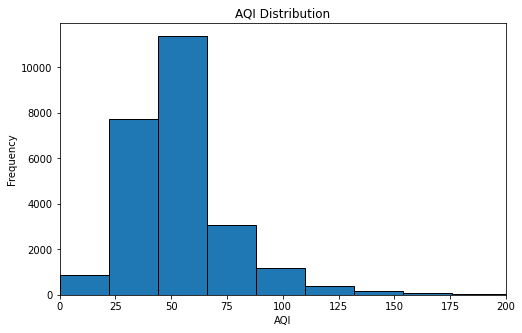

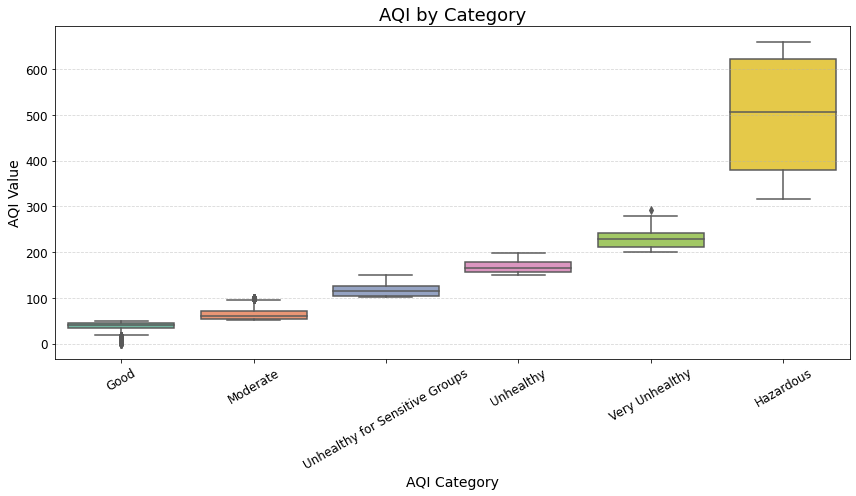

In [24]:
plt.figure(figsize=(8, 5))
df_merged['aqi'].plot(kind='hist', bins=30, edgecolor='black')
plt.xlim(0, 200)
plt.title("AQI Distribution")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(12, 7))
sns.boxplot(x='category', y='aqi', data=df_merged, palette='Set2')
plt.title("AQI by Category", fontsize=18)
plt.xlabel("AQI Category", fontsize=14)
plt.ylabel("AQI Value", fontsize=14)
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




### Classification Model: Predicting AQI Categories from Pollution Data


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df_merged[['o3_mean', 'co_mean', 'so2_mean', 'no2_mean']].dropna()
y = df_merged.loc[X.index, 'category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.5870696557245797


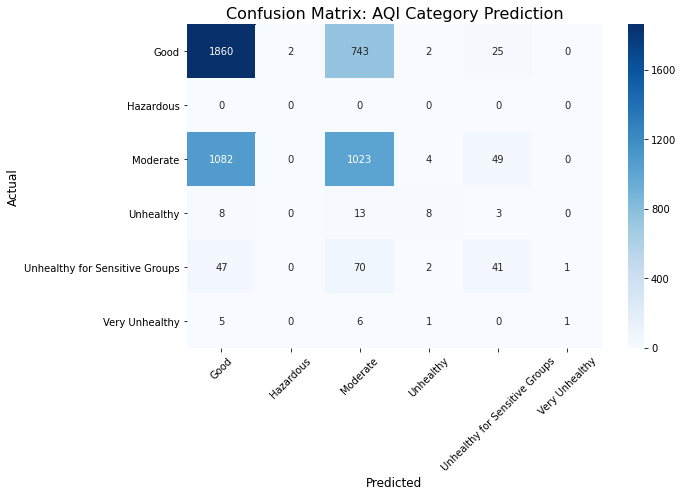

In [32]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix: AQI Category Prediction", fontsize=16)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


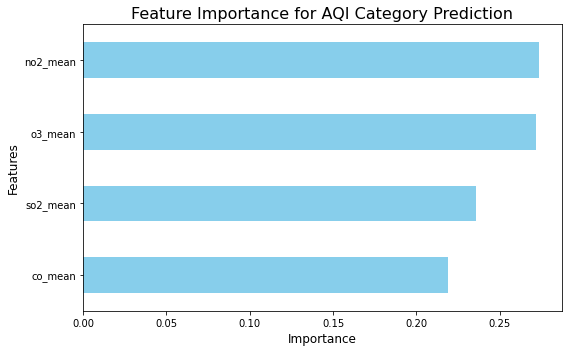

In [33]:
features = X.columns  # Automatically use columns from your training data
importances = model.feature_importances_

feat_series = pd.Series(importances, index=features).sort_values(ascending=True)

plt.figure(figsize=(8, 5))
feat_series.plot(kind='barh', color='skyblue')
plt.title("Feature Importance for AQI Category Prediction", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()


### AQI Category Trends Over Time
#### Visualizing how air quality categories fluctuate daily using 7-day averages


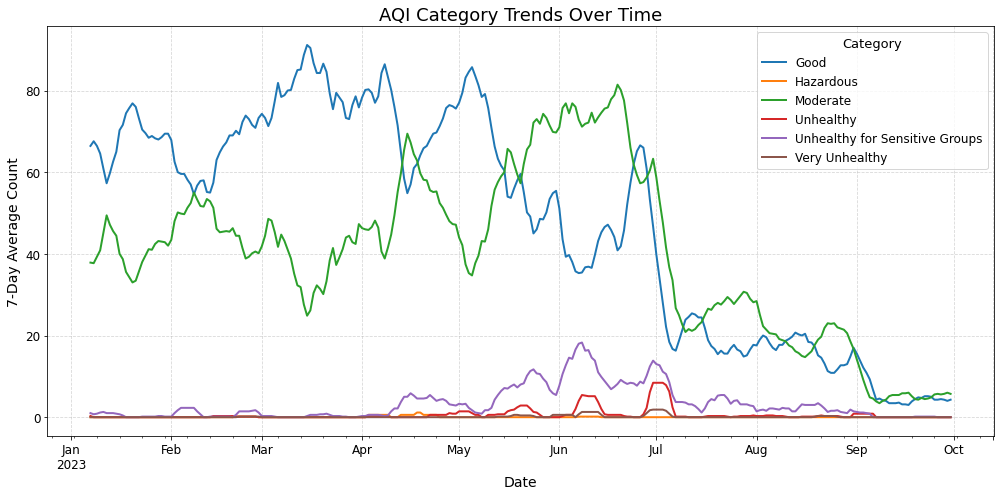

In [36]:
df_merged['date'] = pd.to_datetime(df_merged['date'])
df_plot = df_merged.groupby(['date', 'category']).size().unstack().fillna(0)

df_plot.rolling(7).mean().plot(figsize=(14, 7), linewidth=2)
plt.title("AQI Category Trends Over Time", fontsize=18)
plt.xlabel("Date", fontsize=14)
plt.ylabel("7-Day Average Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Category", fontsize=12, title_fontsize=13)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Conclusion

In this project, I used pollution data to predict Air Quality Index (AQI) categories using a decision tree model. I trained the model using four key features: O₃ (ozone), CO (carbon monoxide), SO₂ (sulfur dioxide), and NO₂ (nitrogen dioxide). 

The model was able to classify AQI categories with a reasonable level of accuracy, as seen in the confusion matrix. Most predictions fell into the correct categories like "Good" and "Moderate", which were also the most common in the dataset.

This project helped me practice data cleaning, visualization, merging datasets, and building my first machine learning classifier. In the future, I could improve this model by adding more data, tuning hyperparameters, or testing different algorithms like Random Forests or SVM.

